```markdown
# Anvendt Programmering 5
---
## Machine Learning Basics with Scikit-Learn and Python




# Introduction

- Welcome to the lecture on Machine Learning Basics with Scikit-Learn and Python.
- Objectives:
  - Understand basic machine learning concepts
  - Learn how to use scikit-learn for machine learning tasks
  - Complete two hands-on exercises

---



# Setting Up Your Environment

- Install packages using pip:

```bash
pip install jupyter
pip install scikit-learn
pip install matplotlib
pip install seaborn
pip install pandas
pip install seaborn
```


In [176]:
%pip install scikit-learn matplotlib seaborn pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



# Understanding the Basics

- **Supervised Learning**: Training a model on labeled data (e.g., classification, regression).
- **Unsupervised Learning**: Training a model on unlabeled data (e.g., clustering, dimensionality reduction).

---


# Unsupervised Learning

A type of machine learning where the algorithm learns patterns from unlabeled data.
- **Key Methods**:
  - Clustering
  - Dimensionality Reduction
- **Applications**:
  - Customer segmentation
  - Anomaly detection
  - Image compression
  

# What is K-means Clustering?

- **K-means Clustering**: A method to partition data into K clusters, where each data point belongs to the cluster with the nearest mean.
- **Steps**:
  1. Initialize K centroids randomly.
  2. Assign each data point to the nearest centroid.
  3. Update centroids by calculating the mean of assigned points.
  4. Repeat steps 2-3 until convergence.

# Visualizing K-means Clustering

- Data points grouped into 4 clusters.
- Feature is just a measurement of a specific sample

In [177]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

plt.style.use('ggplot')

N_CLUSTERS = 2
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=N_CLUSTERS, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,2.406157,4.870475
1,2.580767,0.828599
2,1.062696,5.176351
3,2.548219,0.900839
4,1.390161,5.084895


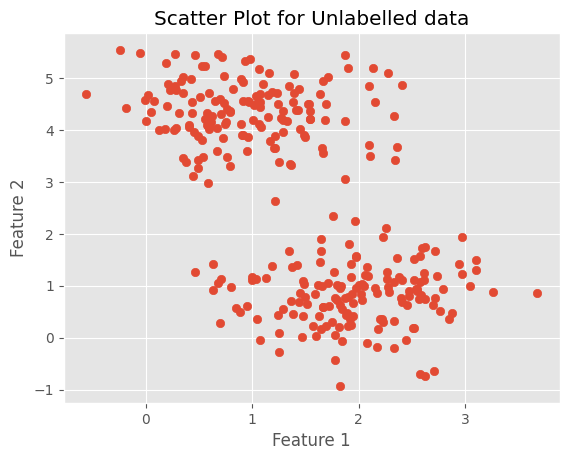

In [178]:

# Visualization of the data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Scatter Plot for Unlabelled data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## K-means Clustering


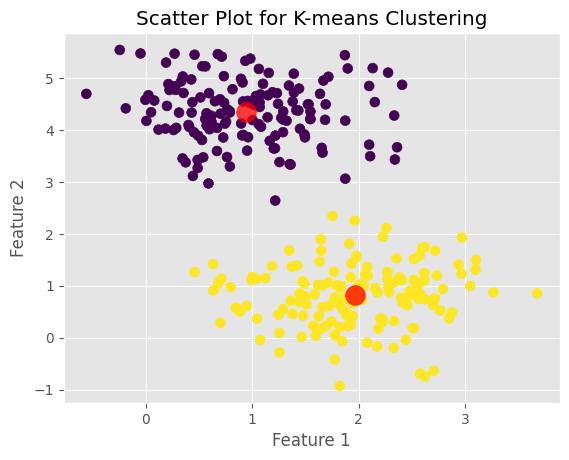

In [179]:

from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualization of the Clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('Scatter Plot for K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# KMeans on breastcancer patients

## Load data

In [180]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the dataframe
df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y
df['Target'] = df['Target'].map({v:k for k, v in enumerate(data.target_names)})
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Visualize Breast Cancer Dataset

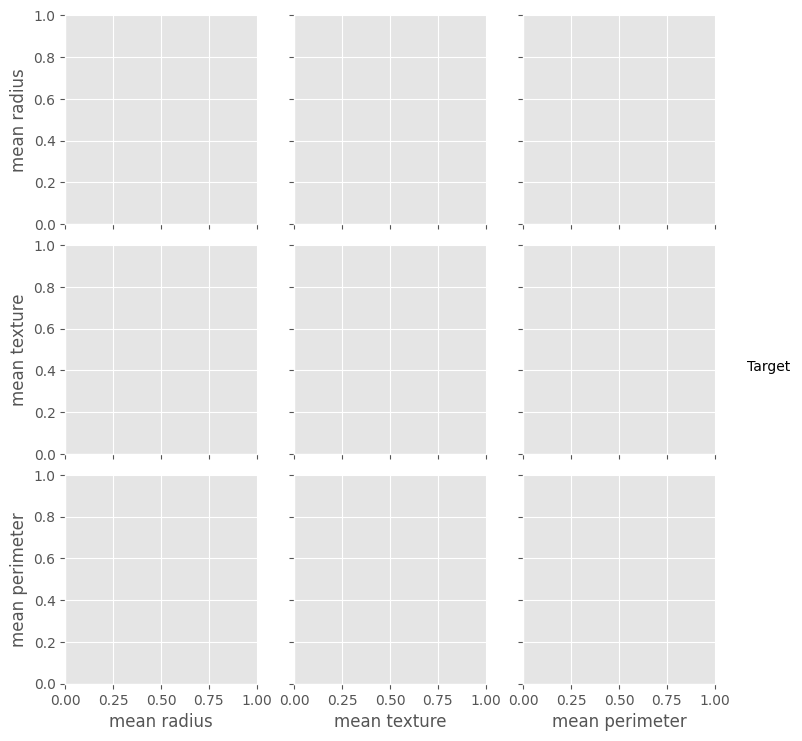

In [181]:
import seaborn as sns
sns.pairplot(df, hue='Target', vars=data.feature_names[:3])
plt.show()

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Apply K-means clustering
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# Map cluster labels to original labels (0: benign, 1: malignant)
mapping = {0: 1, 1: 0} if confusion_matrix(y, y_kmeans)[0][0] < confusion_matrix(y, y_kmeans)[1][0] else {0: 0, 1: 1}
y_kmeans_mapped = [mapping[label] for label in y_kmeans]

# Evaluate the clustering performance
accuracy = accuracy_score(y, y_kmeans_mapped)
conf_matrix = confusion_matrix(y, y_kmeans_mapped)

# Print the results
print(f"KMeans Accuracy using {len(data.feature_names)} features: {accuracy:.2f}")
print(f"KMeans Confusion Matrix using {len(data.feature_names)} features:")
print(conf_matrix)


KMeans Accuracy using 30 features: 0.91
KMeans Confusion Matrix using 30 features:
[[175  37]
 [ 13 344]]


C:\Users\MSA\AppData\Local\Temp\ipykernel_29408\2344486490.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster/Target')


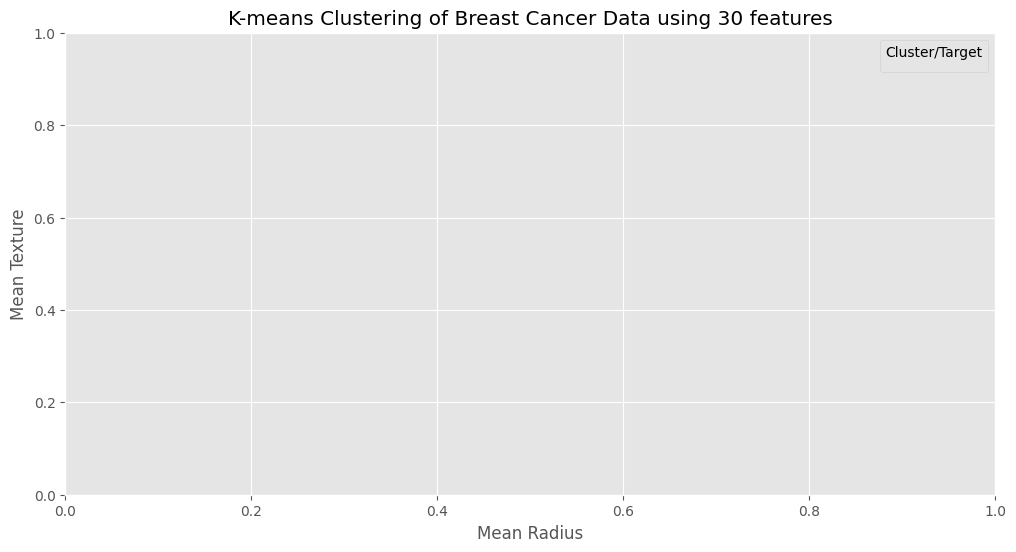

In [183]:



# Visualize the clusters
df['Cluster'] = y_kmeans_mapped
df['Cluster'] = df['Cluster'].map({i:v for i,v in enumerate(data.target_names)})


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='Cluster', style='Target', palette='viridis')
plt.title(f'K-means Clustering of Breast Cancer Data using {len(data.feature_names)} features')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(title='Cluster/Target')
plt.show()

# Supervised Learning






## Splitting Data into training and test datasets

- Splitting data into training and testing sets helps evaluate the model's performance on unseen data, ensuring it generalizes well.

- Data can be split into Training, Test, Validation
- Generally a good split is:
    - Training:80\%
    - Test 20\% 
    - At some point you will also get to worry about validation, however, we will skip this for now!


In [184]:

from sklearn.model_selection import train_test_split
# Normalize X
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## K Nearest Neighbors

- Lazy Learner
- K: How many neighbors, should be considered, to find the closet fit
    - Basically, if K = 3, then we find the three closest samples to a given sample, and pick the majority


## 
1. The k-nearest neighbor algorithm is imported from the scikit-learn package.
2. Create feature and target variables. 
3. Split data into training and test data.
4. Generate a k-NN model using neighbors value.
5. Train or fit the data into the model.
6. Predict the future.

In [238]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
df_test = pd.DataFrame(X_test, columns=data.feature_names)

df_test["y_target"] = y_test
df_test["predicted_knn"] = predicted_knn

# Calculate the accuracy of the model

print(f"Accuracy: {knn.score(X_test, y_test)*100:.1f}%")


Accuracy: 94.7%



# Slide 7: Choosing a Model


**Why Choose a Model?**

- Different models have different strengths and weaknesses. Choosing the right model is crucial for achieving good performance.

In [ ]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()




# Slide 8: Training the Model with One Feature

**Why Train the Model?**

- Training the model involves learning patterns from the training data, which the model uses to make predictions.

In [ ]:


# Use only one feature for training
X_train_one_feature = X_train[:, [0]]  # Using 'mean radius'
X_test_one_feature = X_test[:, [0]]

model.fit(X_train_one_feature, y_train)


DecisionTreeClassifier()


# Slide 9: Making Predictions with One Feature

**Why Make Predictions?**

- Making predictions on the test data allows us to evaluate how well the model performs on unseen data.

In [ ]:


y_pred_one_feature = model.predict(X_test_one_feature)



# Slide 10: Evaluating the Model with One Feature

**Why Evaluate the Model?**
- Evaluating the model's performance helps us understand its accuracy and identify areas for improvement.

In [ ]:

from sklearn.metrics import accuracy_score


accuracy_one_feature = accuracy_score(y_test, y_pred_one_feature)
print(f"Accuracy with one feature: {accuracy_one_feature}")


Accuracy with one feature: 0.8508771929824561



## Slide 11: Training the Model with Multiple Features



In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()


## Slide 12: Making Predictions with Multiple Features


In [ ]:

y_pred = model.predict(X_test)



## Slide 13: Evaluating the Model with Multiple Features


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with multiple features: {accuracy}")


Accuracy with multiple features: 0.9298245614035088





## Slide 14: Exercise 1 - Classification with Breast Cancer Dataset

**Objective**: Train a classifier on the Breast Cancer dataset and evaluate its performance.
Steps:
1. Load the Breast Cancer dataset.
2. Split the data into training and testing sets.
3. Train a Decision Tree classifier using one feature.
4. Train a Decision Tree classifier using multiple features.
5. Make predictions and evaluate accuracy.



In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with one feature
X_train_one_feature = X_train[:, [0]]  # Using 'mean radius'
X_test_one_feature = X_test[:, [0]]
model = DecisionTreeClassifier()
model.fit(X_train_one_feature, y_train)

# Make predictions with one feature
y_pred_one_feature = model.predict(X_test_one_feature)

# Evaluate model with one feature
accuracy_one_feature = accuracy_score(y_test, y_pred_one_feature)
print(f"Accuracy with one feature: {accuracy_one_feature}")

# Train model with multiple features
model.fit(X_train, y_train)

# Make predictions with multiple features
y_pred = model.predict(X_test)

# Evaluate model with multiple features
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with multiple features: {accuracy}")



Accuracy with one feature: 0.8508771929824561
Accuracy with multiple features: 0.9473684210526315



---

## Slide 15: Improving the Model

**Why Improve the Model?**
- Improving the model can lead to better performance and more accurate predictions.
- Experiment with different models, hyperparameters, and feature engineering to improve performance.

**Examples:**
- Hyperparameter Tuning: Adjusting parameters like max_depth for Decision Trees.
- Feature Engineering: Creating new features from existing data.


---

## Slide 16: Exercise 2 - Hyperparameter Tuning

```python
# Objective: Improve the classifier's performance by tuning hyperparameters.
# Steps:
# 1. Use GridSearchCV to find the best hyperparameters for the Decision Tree classifier.
# 2. Train the model with the best parameters.
# 3. Evaluate the improved model.

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'max_depth': [3, 5, 7, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train model with best parameters
model = DecisionTreeClassifier(**best_params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy}")
```

---

## Slide 17: Next Steps

```python
# Explore more advanced topics like cross-validation, feature selection, and model tuning.
# Check out the scikit-learn documentation for more information.
```

---

## Slide 18: Q&A

```python
# Open floor for questions and discussion.
```

---

## Slide 19: Conclusion

```python
# Recap of key points covered in the lecture.
# Encouragement to continue exploring machine learning.
```
